<a href="https://colab.research.google.com/github/timonpalm/TFCourse/blob/main/01_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Nueral Networks in Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating some data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

In [ ]:
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

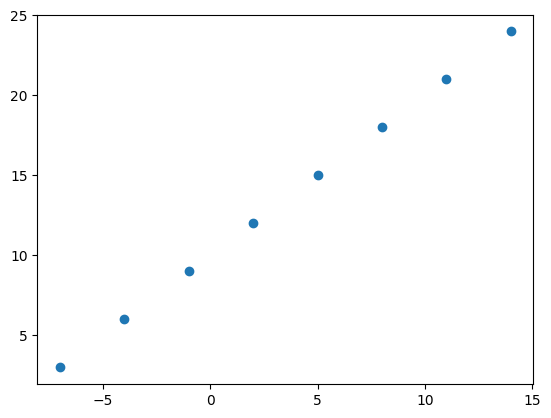

In [ ]:
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
y = tf.constant(y)
X = tf.constant(X)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 21.4335 - mae: 21.4335
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 21.0404 - mae: 21.0404
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 20.6473 - mae: 20.6473
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 20.3085 - mae: 20.3085
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 20.0273 - mae: 20.0273
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 19.7460 - mae: 19.7460
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 19.4648 - mae: 19.4648
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 19.1835 - mae: 19.1835
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 18.9023 - mae: 18.9023
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 18.6210 - mae: 18.6210
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.count_params()

2

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[29.333347]], dtype=float32)

## Improving the model

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 13.4510 - mae: 13.4510
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 13.4194 - mae: 13.4194
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 13.3900 - mae: 13.3900
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 13.3623 - mae: 13.3623
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 13.3340 - mae: 13.3340
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 13.3054 - mae: 13.3054
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 13.2777 - mae: 13.2777
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 13.2496 - mae: 13.2496
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 13.2226 - mae: 13.2226
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 13.1977 - mae: 13.1977


In [ ]:
X = tf.constant(np.arange(-20, 50)[:,np.newaxis])
y = X + 10

In [ ]:
X[:10], y[:10]

(<tf.Tensor: shape=(10, 1), dtype=int64, numpy=
 array([[-20],
        [-19],
        [-18],
        [-17],
        [-16],
        [-15],
        [-14],
        [-13],
        [-12],
        [-11]])>,
 <tf.Tensor: shape=(10, 1), dtype=int64, numpy=
 array([[-10],
        [ -9],
        [ -8],
        [ -7],
        [ -6],
        [ -5],
        [ -4],
        [ -3],
        [ -2],
        [ -1]])>)

In [ ]:
X.shape, y.shape

(TensorShape([70, 1]), TensorShape([70, 1]))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
    metrics=["mse"]
)

In [ ]:
model.fit(X,y,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 1172.2743 - mse: 1172.2743
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 1153.9346 - mse: 1153.9346
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1135.8690 - mse: 1135.8690
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1118.5786 - mse: 1118.5786
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1101.2400 - mse: 1101.2400
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1084.4056 - mse: 1084.4056
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1070.6818 - mse: 1070.6818
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 1060.9586 - mse: 1060.9586
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1051.7671 - mse: 1051.7671
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 1041.8041 - mse: 1041.8041
Epoch 11/100
3/3 [=

In [ ]:
test = tf.range(-100,100,4)
gt = test + 10
res = model.predict(test)

2/2 [==============================] - 0s 6ms/step


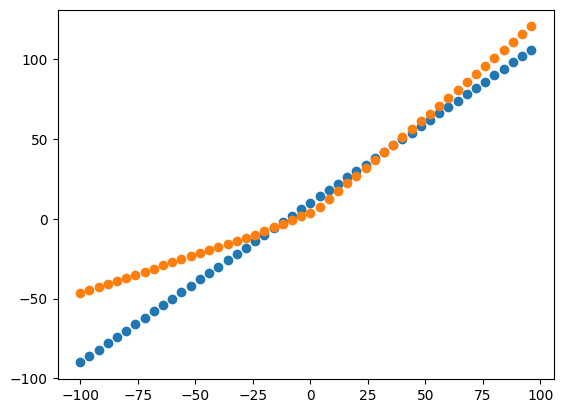

In [ ]:
plt.scatter(test, gt)
plt.scatter(test, res)

In [ ]:
n = len(X)
split_idx = int(n * .7)
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]